### 优化方法
到目前为止，您始终使用Gradient Descent更新参数并最大限度地降低成本。在这个笔记本中，您将学习更多高级优化方法，这些方法可以加快学习速度，甚至可以让您获得更好的成本函数最终值。拥有一个好的优化算法可能是等待天数与短短几个小时之间的差异，以获得良好的结果。

梯度下降在成本函数J上“下坡”。把它想象成试图这样做：
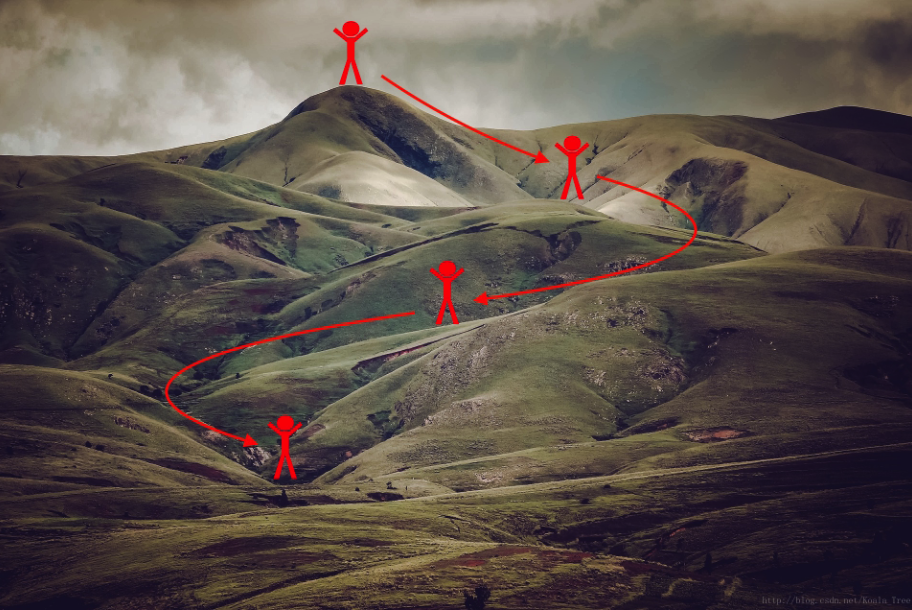

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import math
import sklearn
import sklearn.datasets

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


In [15]:
def sigmoid(x):
    
    s = 1/(1+np.exp(-x))
    return s

def relu(x):
    
    s = np.maximum(0,x)
    
    return s
#创造参数和梯度
def load_params_and_grads(seed=1):
    np.random.seed(seed)
    W1 = np.random.randn(2,3)
    b1 = np.random.randn(2,1)
    W2 = np.random.randn(3,3)
    b2 = np.random.randn(3,1)

    dW1 = np.random.randn(2,3)
    db1 = np.random.randn(2,1)
    dW2 = np.random.randn(3,3)
    db2 = np.random.randn(3,1)

    return W1, b1, W2, b2, dW1, db1, dW2, db2

#随机初始化多层线性参数
def initialize_parameters(layer_dims):
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])*  np.sqrt(2 / layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

        assert(parameters['W' + str(l)].shape == layer_dims[l], layer_dims[l-1])
        assert(parameters['W' + str(l)].shape == layer_dims[l], 1)

    return parameters

#前向传播
def forward_propagation(X, parameters):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]

    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    z1 = np.dot(W1, X) + b1
    a1 = relu(z1)
    z2 = np.dot(W2, a1) + b2
    a2 = relu(z2)
    z3 = np.dot(W3, a2) + b3
    a3 = sigmoid(z3)

    cache = (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3)

    return a3, cache

#反向传播
def backward_propagation(X, Y, cache):
    
    m = X.shape[1]
    (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3) = cache

    dz3 = 1./m * (a3 - Y)
    dW3 = np.dot(dz3, a2.T)
    db3 = np.sum(dz3, axis=1, keepdims = True)

    da2 = np.dot(W3.T, dz3)
    dz2 = np.multiply(da2, np.int64(a2 > 0))
    dW2 = np.dot(dz2, a1.T)
    db2 = np.sum(dz2, axis=1, keepdims = True)

    da1 = np.dot(W2.T, dz2)
    dz1 = np.multiply(da1, np.int64(a1 > 0))
    dW1 = np.dot(dz1, X.T)
    db1 = np.sum(dz1, axis=1, keepdims = True)

    gradients = {"dz3": dz3, "dW3": dW3, "db3": db3,
                 "da2": da2, "dz2": dz2, "dW2": dW2, "db2": db2,
                 "da1": da1, "dz1": dz1, "dW1": dW1, "db1": db1}

    return gradients

#计算误差
def compute_cost(a3, Y):

   
    m = Y.shape[1]

    logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
    cost = 1./m * np.sum(logprobs)

    return cost


def predict(X, y, parameters):
    
    m = X.shape[1]
    p = np.zeros((1,m), dtype = np.int)  
    a3, caches = forward_propagation(X, parameters)

    for i in range(0, a3.shape[1]):
        if a3[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0

    print("Accuracy: "  + str(np.mean((p[0,:] == y[0,:]))))

    return p

#predict
def predict_dec(parameters, X):
   
    a3, cache = forward_propagation(X, parameters)
    predictions = (a3 > 0.5)
    return predictions

#绘图
def plot_decision_boundary(model, X, y):
    
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y[0], cmap=plt.cm.Spectral)
    plt.show()

#加载数据
def load_dataset():
    np.random.seed(3)
    train_X, train_Y = sklearn.datasets.make_moons(n_samples=300, noise=.2) #300 #0.2 
    plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=40, cmap=plt.cm.Spectral);
    train_X = train_X.T
    train_Y = train_Y.reshape((1, train_Y.shape[0]))

    return train_X, train_Y


<ipython-input-15-b69e5832e1f6>:37: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(parameters['W' + str(l)].shape == layer_dims[l], layer_dims[l-1])
<ipython-input-15-b69e5832e1f6>:38: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(parameters['W' + str(l)].shape == layer_dims[l], 1)


In [16]:
#梯度下降更新参数
def update_parameters_with_gd(parameters, grads, learning_rate):
    L = len(parameters) // 2 
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*grads["db" + str(l+1)]
        
    return parameters



###  具有不同优化算法的模型

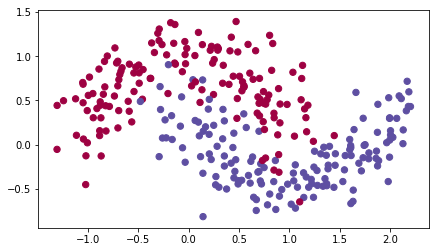

In [17]:
train_X, train_Y = load_dataset()

In [18]:
train_X.shape

(2, 300)

In [19]:
train_Y.shape

(1, 300)

In [23]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    #随机种子
    np.random.seed(seed)            
    m = X.shape[1]
    #把一个大样本拆分成多个小样本
    mini_batches = []
    #随机化索引
    permutation = list(np.random.permutation(m))
    #x与y成对洗牌
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((1,m))

    #需要分成多少组
    num_complete_minibatches = math.floor(m/mini_batch_size) 
    for k in range(0, num_complete_minibatches):
        #每组的样本
        mini_batch_X = shuffled_X[:, k*mini_batch_size : (k+1)*mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k*mini_batch_size : (k+1)*mini_batch_size]
        #添加到mini_batches中
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    #没法整除的情况下需要添加最后一组
    if m % mini_batch_size != 0:
        #添加最后一组
        mini_batch_X = shuffled_X[:, num_complete_minibatches*mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches*mini_batch_size : m]
        
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    #返回多个小样本
    return mini_batches


In [24]:
#验证一下分组
mini_batches = random_mini_batches(train_X, train_Y, mini_batch_size = 64, seed = 0)
print ("shape of the 1st mini_batch_X: " + str(mini_batches[0][0].shape))
print ("shape of the 2nd mini_batch_X: " + str(mini_batches[1][0].shape))
print ("shape of the 3rd mini_batch_X: " + str(mini_batches[2][0].shape))
print ("shape of the 1st mini_batch_Y: " + str(mini_batches[0][1].shape))
print ("shape of the 2nd mini_batch_Y: " + str(mini_batches[1][1].shape)) 
print ("shape of the 3rd mini_batch_Y: " + str(mini_batches[2][1].shape))
print ("mini batch sanity check: " + str(mini_batches[0][0][0][0:3]))


shape of the 1st mini_batch_X: (2, 64)
shape of the 2nd mini_batch_X: (2, 64)
shape of the 3rd mini_batch_X: (2, 64)
shape of the 1st mini_batch_Y: (1, 64)
shape of the 2nd mini_batch_Y: (1, 64)
shape of the 3rd mini_batch_Y: (1, 64)
mini batch sanity check: [-0.14656235  0.22452308  1.38239247]


#### 下面开始涉及指数加权移动平均

In [25]:
def initialize_velocity(parameters):
    
    L = len(parameters) // 2 
    v = {}
    for l in range(L):
        v["dW" + str(l+1)] = np.zeros(parameters["W" + str(l+1)].shape)
        v["db" + str(l+1)] = np.zeros(parameters["b" + str(l+1)].shape) 
    return v



In [30]:
#按照指数加权移动平均去更新参数（动量梯度下降）无修正版本
def update_parameters_with_momentum(parameters, grads, v, beta, learning_rate):
    """
    需要初始化动量，之后每一次都会用到前面的动量结果，需要设置beta参数和学习率，需要求出梯度
    """
    #层数
    L = len(parameters) // 2 
    for l in range(L):

        v["dW" + str(l+1)] = beta*v["dW" + str(l+1)] + (1-beta)*grads["dW" + str(l+1)]
        v["db" + str(l+1)] = beta*v["db" + str(l+1)] + (1-beta)*grads["db" + str(l+1)]
        
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*v["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*v["db" + str(l+1)]

    return parameters, v


In [26]:
#adam 算法  结合了动量和RMSProp算法
def initialize_adam(parameters) :
    #分别初始化动量和RMSRrop的参数
    L = len(parameters) // 2 
    v = {}
    s = {}

    for l in range(L):
    
        v["dW" + str(l+1)] = np.zeros(parameters["W" + str(l+1)].shape)
        v["db" + str(l+1)] = np.zeros(parameters["b" + str(l+1)].shape)
        s["dW" + str(l+1)] = np.zeros(parameters["W" + str(l+1)].shape)
        s["db" + str(l+1)] = np.zeros(parameters["b" + str(l+1)].shape)

    return v, s
#更新参数
def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate = 0.01,
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    

    L = len(parameters) // 2               
    v_corrected = {}                        
    s_corrected = {}                        

   
    for l in range(L):
       
        v["dW" + str(l+1)] = beta1 * v["dW" + str(l+1)] + (1 - beta1) * grads['dW' + str(l+1)]
        v["db" + str(l+1)] = beta1 * v["db" + str(l+1)] + (1 - beta1) * grads['db' + str(l+1)]
       
        v_corrected["dW" + str(l+1)] = v["dW" + str(l+1)] / (1 - beta1 ** t)
        v_corrected["db" + str(l+1)] = v["db" + str(l+1)] / (1 - beta1 ** t)
        
        s["dW" + str(l+1)] = s["dW" + str(l+1)] + (1 - beta2) * (grads['dW' + str(l+1)] ** 2)
        s["db" + str(l+1)] = s["db" + str(l+1)] + (1 - beta2) * (grads['db' + str(l+1)] ** 2)
        
        s_corrected["dW" + str(l+1)] = s["dW" + str(l+1)] / (1 - beta2 ** t)
        s_corrected["db" + str(l+1)] = s["db" + str(l+1)] / (1 - beta2 ** t)
        
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * ( v_corrected["dW" + str(l+1)] / (np.sqrt(s_corrected["dW" + str(l+1)]) + epsilon))
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * ( v_corrected["db" + str(l+1)] / (np.sqrt(s_corrected["db" + str(l+1)]) + epsilon))
        

    return parameters, v, s


In [27]:
#下面用一个模型分别应用不同方法尝试效果
def model(X, Y, layers_dims, optimizer, learning_rate = 0.0007, mini_batch_size = 64, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 10000, print_cost = True):
    
    #神经网络层数
    L = len(layers_dims)    
    #记录误差
    costs = []
    #初始化 adam需要的计数器
    t = 0  
    #随机种子
    seed = 10                       

    # 初始化参数返回多层线性参数
    parameters = initialize_parameters(layers_dims)

    # #梯度下降不需要初始化
    if optimizer == "gd":
        pass 
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
    
    for i in range(num_epochs):
        seed = seed + 1
        #多个小样本组
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)

        for minibatch in minibatches:

            (minibatch_X, minibatch_Y) = minibatch

            # 前向传播
            a3, caches = forward_propagation(minibatch_X, parameters)

            # 计算误差
            cost = compute_cost(a3, minibatch_Y)

            # 反向传播得到梯度
            grads = backward_propagation(minibatch_X, minibatch_Y, caches)

            # 根据不同算法更新参数
            if optimizer == "gd":
                parameters = update_parameters_with_gd(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1 # Adam counter
                parameters, v, s = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)

        # 打印
        if print_cost and i % 1000 == 0:
            print ("Cost after epoch %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)

    # 绘制成本曲线
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return parameters


Cost after epoch 0: 0.690736
Cost after epoch 1000: 0.685273
Cost after epoch 2000: 0.647072
Cost after epoch 3000: 0.619525
Cost after epoch 4000: 0.576584
Cost after epoch 5000: 0.607243
Cost after epoch 6000: 0.529403
Cost after epoch 7000: 0.460768
Cost after epoch 8000: 0.465586
Cost after epoch 9000: 0.464518


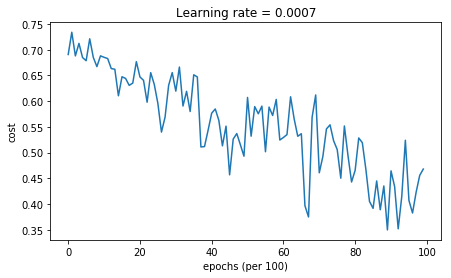

Accuracy: 0.7966666666666666


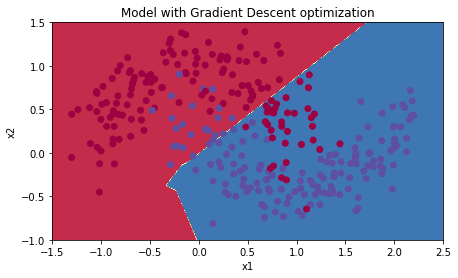

In [28]:
#三层神经网络，小批量梯度下降
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "gd")
# 预测
predictions = predict(train_X, train_Y, parameters)

# 绘图
plt.title("Model with Gradient Descent optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)


Cost after epoch 0: 0.690741
Cost after epoch 1000: 0.685341
Cost after epoch 2000: 0.647145
Cost after epoch 3000: 0.619594
Cost after epoch 4000: 0.576665
Cost after epoch 5000: 0.607324
Cost after epoch 6000: 0.529476
Cost after epoch 7000: 0.460936
Cost after epoch 8000: 0.465780
Cost after epoch 9000: 0.464740


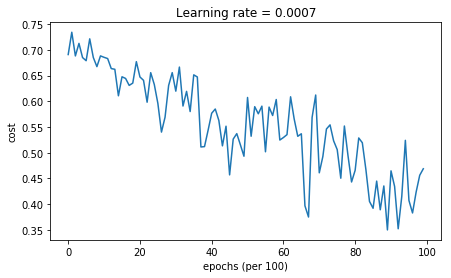

Accuracy: 0.7966666666666666


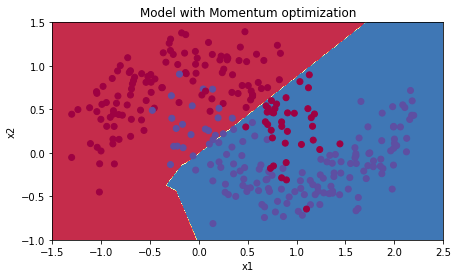

In [31]:
#动量梯度下降
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, beta = 0.9, optimizer = "momentum")

predictions = predict(train_X, train_Y, parameters)

plt.title("Model with Momentum optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)


Cost after epoch 0: 0.690552
Cost after epoch 1000: 0.233787
Cost after epoch 2000: 0.179942
Cost after epoch 3000: 0.099978
Cost after epoch 4000: 0.142203
Cost after epoch 5000: 0.114152
Cost after epoch 6000: 0.128446
Cost after epoch 7000: 0.042047
Cost after epoch 8000: 0.132215
Cost after epoch 9000: 0.214512


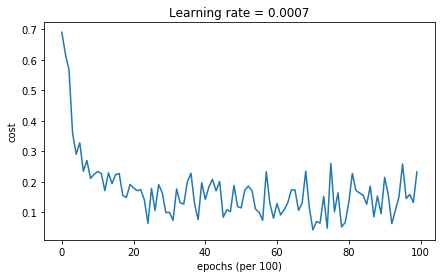

Accuracy: 0.9366666666666666


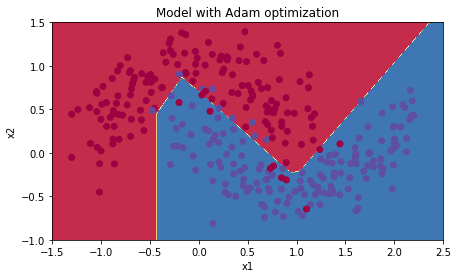

In [32]:
#adam 梯度下降
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "adam")

predictions = predict(train_X, train_Y, parameters)

plt.title("Model with Adam optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)


In [33]:
### adam真的很好用